## A First Model Using Indra2 ##

The aim of re-writing the library code upon which Indra models relied was to reduce the complexity of the system, and achieve greater expressiveness with fewer lines of code.

So far, the results look promising. Let's take a look at the beginnings of the first model being written based on the `indra2` library. This is a classic <a href="https://en.wikipedia.org/wiki/Lotka–Volterra_equations">predator-prey model</a>, often called "wolf-sheep" in the ABM world. The central idea is to model how populations of predators and their prey will cycle in a circumscribed environment.

The first thing to do is import the (few!) items we need to get going:

In [2]:
from indra.agent import Agent, AgentEncoder
from indra.composite import Composite
from indra.env import Env

Next define a few constants -- these will be params in the fully developed system:

In [3]:
NUM_WOLVES = 3
NUM_SHEEP = 12

WOLF_LIFESPAN = 5
WOLF_REPRO_PERIOD = 6

SHEEP_LIFESPAN = 8
SHEEP_REPRO_PERIOD = 6

Now we will define what wolves and sheep do when called upon to act -- the model is far from done at this point, and these actions are trivial, but they illustrate the use of the system:

In [4]:
def sheep_action(agent):
    print("I'm " + agent.name + " and I eat grass.")
    
def wolf_action(agent):
    print("I'm " + agent.name + " and my remaining life is: "
          + str(agent.duration))

Next let's create to helper functions to create wolves and sheep, just to make the code following this a little simpler:

In [5]:
def create_wolf(i):
    return Agent("wolf" + str(i), duration=WOLF_LIFESPAN,
                     action=wolf_action,
                     attrs={"time_to_repr": WOLF_REPRO_PERIOD})


def create_sheep(i):
    return Agent("sheep" + str(i), duration=SHEEP_LIFESPAN,
                     action=sheep_action,
                     attrs={"time_to_repr": SHEEP_REPRO_PERIOD})

Now we have everything we need to create our populations and put them in a meadow to interact:

In [6]:
wolves = Composite("wolves")
for i in range(NUM_WOLVES):
    wolves += create_wolf(i)

sheep = Composite("sheep")
for i in range(NUM_SHEEP):
    sheep += create_sheep(i)

Now we will create a "meadow" in which these critters will interact -- the meadow is, right now, an instance of `Time` but it will ultimately be an instance of `SpaceTime`, once we are done building `Space`:

In [7]:
meadow = Env("meadow")
meadow += wolves
meadow += sheep

Welcome to Indra, workspace!


Lastly, we set things going in the meadow:


***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Examine model data
0.  Quit
Please choose a number from the menu above:
1
How many periods? 10
Steps = 10
I'm wolf0 and my remaining life is: 4
I'm wolf1 and my remaining life is: 4
I'm wolf2 and my remaining life is: 4
I'm sheep0 and I eat grass.
I'm sheep1 and I eat grass.
I'm sheep2 and I eat grass.
I'm sheep3 and I eat grass.
I'm sheep4 and I eat grass.
I'm sheep5 and I eat grass.
I'm sheep6 and I eat grass.
I'm sheep7 and I eat grass.
I'm sheep8 and I eat grass.
I'm sheep9 and I eat grass.
I'm sheep10 and I eat grass.
I'm sheep11 and I eat grass.

Total census for period 1:
Group census:
  wolf0: 1
  wolf1: 1
  wolf2: 1
  sheep0: 1
  sheep1: 1
  sheep2: 1
  sheep3: 1
  sheep4: 1
  sheep5: 1
  sheep6: 1
  sheep7: 1
  sheep8: 1
  sheep9: 1
  sheep10: 1
  sheep11: 1
Agent census:
  Total agents moved: 15
  Total agents who switched groups: 0
I'm wolf0 a

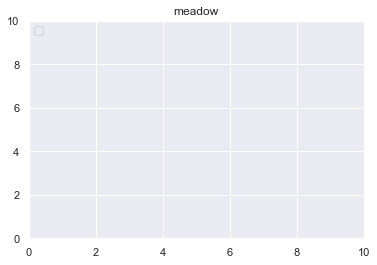


***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Examine model data
0.  Quit
Updating the scatter plot.


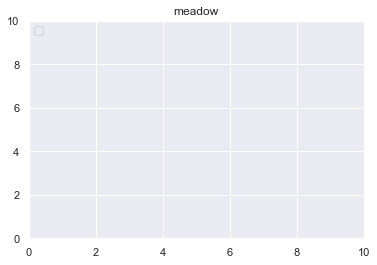

Please choose a number from the menu above:
2
Drawing a line graph.
No data to display.

***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Examine model data
0.  Quit
Updating the line graph.
No data to display.
Please choose a number from the menu above:
3
Drawing a scatter plot.


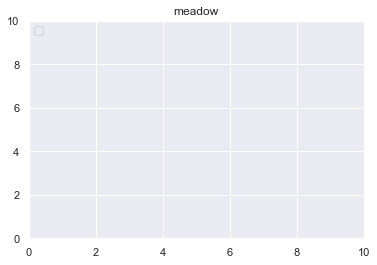


***************
Menu of Actions
***************
1.  Run for N periods
2.  Display a population graph
3.  Display a scatter plot
4.  Examine model data
0.  Quit
Updating the scatter plot.


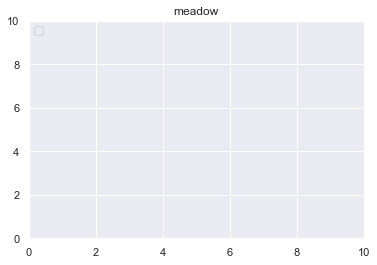

Please choose a number from the menu above:
0
Goodbye, workspace, I will miss you!


In [9]:
meadow()